# 🛳️ Primer modelo: Titanic — Predicción de Supervivencia

Vamos a trabajar con el famoso dataset del Titanic para construir nuestro primer modelo de *Machine Learning*.

**Objetivo:** predecir si un pasajero sobrevivió o no en función de sus características (edad, sexo, clase, tarifa, etc.).

Se trata de un problema de **clasificación** porque nuestro objetivo es predecir si un pasajero **sobrevive (1)** o **no sobrevive (0)**.
Como la variable objetivo es **binaria (sí/no)**, se trata de un problema de **clasificación binaria**, no de regresión.


En este proyecto usamos **K-Nearest Neighbors (KNN)** porque es un algoritmo:

* Fácil de entender y visualizar
* Bueno para empezar a aprender Machine Learning
* No requiere asumir relaciones matemáticas complicadas
* Funciona bien en problemas pequeños como Titanic

KNN clasifica a un pasajero **mirando los pasajeros más similares** y votando qué clase es más común (sobrevive o no sobrevive).

**¿Qué otros modelos podríamos usar?**

Como es un problema de **clasificación**, podríamos usar otros algoritmos como:

| Modelo                           | Motivo                                   |
| -------------------------------- | ---------------------------------------- |
| **Regresión logística**          | Modelo base, interpretable y muy usado   |
| **Árbol de decisión**            | Fácil de entender visualmente            |
| **Random Forest**                | Varios árboles para mejor precisión      |
| **Gradient Boosting / XGBoost**  | Muy buenos resultados (más avanzados)    |
| **Support Vector Machine (SVM)** | Clasificador potente para datos pequeños |
| **Naive Bayes**                  | Rápido y fácil para empezar              |


En este notebook haremos:

1. **Cargar el dataset**
2. **EDA (Exploratory Data Analysis)**

   * Entender los datos, detectar nulos y outliers, visualizar patrones
3. **Preprocesamiento**

   * Imputar valores faltantes
   * Codificar variables categóricas
   * Escalar variables numéricas
4. **Entrenar un modelo de Machine Learning**
5. **Evaluar el modelo**

   * Métricas de clasificación (accuracy, matriz de confusión, etc.)




In [ ]:
# =========================================================
# TITANIC - CLASIFICACIÓN BINARIA CON KNN
# =========================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Cargar el dataset
df = pd.read_csv("sample_data/titanic.csv")
print("Tamaño del dataset:", df.shape)
df.head(10)

Tamaño del dataset: (1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 🔍 Exploratory Data Analysis (EDA)

Antes de entrenar un modelo, necesitamos **conocer y entender los datos**.
Esta etapa se llama **EDA — Exploratory Data Analysis**.

El objetivo es **explorar los datos sin modificarlos**, para detectar patrones, problemas y pistas útiles.

En EDA normalmente:

* Vemos la estructura del dataset (`head()`, `info()`)
* Analizamos tipos de variables (numéricas / categóricas)
* Buscamos valores faltantes (NaNs)
* Identificamos posibles *outliers*
* Analizamos distribuciones (histogramas, boxplots)
* Estudiamos relaciones con la variable objetivo (`groupby`, gráficas)

> **Objetivo:** entender los datos antes de modelar.
> *Mira primero, transforma después.*

Una buena EDA nos ayuda a decidir qué hacer en el siguiente paso: **preprocesamiento**.


In [ ]:
# Analizamos los tipos de datos para ver futuras conversiones
df.info()

# Conclusión:
# Name, Sex, Ticket, Cabin y Embarked son string, habrá que tratarlas si van a estar en nuestro dataset
# Entre ellas, Name, Ticket y Cabin son texto libre y aportarán más ruido que datos útiles al modelo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
# Analizamos si hay valores nulos de los que nos debamos ocupar más tarde
df.isna().sum()

# Tenemos nulos en Age, Cabin y Embarked. Si los mantenemos, debemos tratarlos

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
# Analizamos los primeros datos para ver qué variables podrían no ser relavantes
df.head()

# Con un simple vistazo, podemos determinar que el PassengerId, Name, Ticket y Cabin no van a tener utilizadad
# (las tres últimas porque son texto libre)
# Fare y Embarked hay que estudiarlos para ver si son útiles

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pclass
1    57.585139
2    42.238267
3    26.939351
Name: Survived, dtype: float64


<Axes: xlabel='Pclass', ylabel='Survived'>

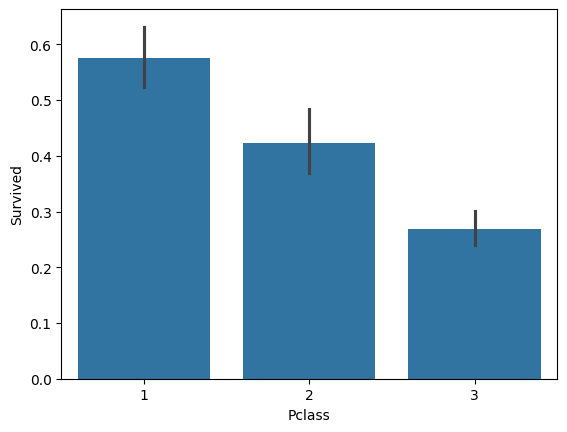

In [ ]:
# Analizamos qué variables tienen más relación con la variable target (Survived)

# Vemos la relación con la clase
print(df.groupby('Pclass')['Survived'].mean() * 100)
sns.barplot(x='Pclass', y='Survived', data=df)

# Conclusión: es importante, cuanta más alta sea la clase, mayor superviviencia.

Sex
female    82.618026
male      12.930012
Name: Survived, dtype: float64


<Axes: xlabel='Sex', ylabel='Survived'>

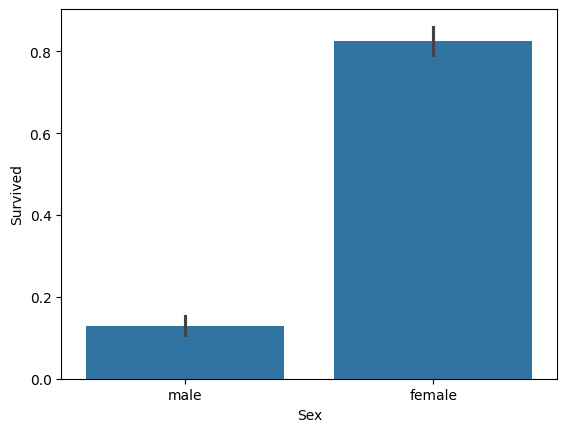

In [ ]:
# Vemos la relación con el Sexo
print(df.groupby('Sex')['Survived'].mean() * 100)
sns.barplot(x='Sex', y='Survived', data=df)

# Conclusión: es importante, las mujeres tienen mayor probabilidad de supervivencia

Age_bin
Niño           55.319149
Adolescente    42.424242
Adulto         37.730871
Mayor          38.947368
Name: Survived, dtype: float64


/tmp/ipython-input-2170402282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Age_bin")["Survived"].mean() * 100)


<Axes: xlabel='Age_bin', ylabel='Survived'>

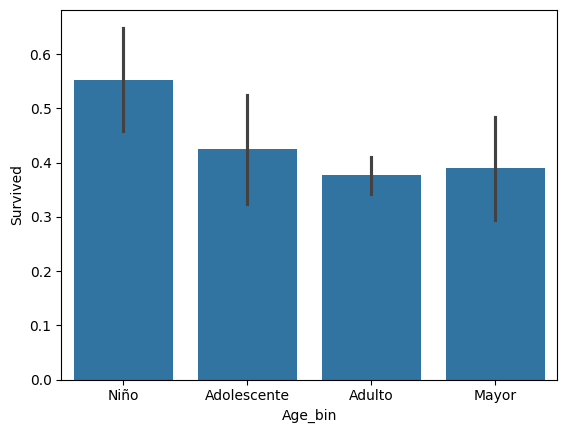

In [ ]:

# Vemos la relación con la edad (tenemos que hacer grupos para interpretar bien)
df["Age_bin"] = pd.cut(df["Age"], bins=[0, 12, 18, 50, 100],
                       labels=["Niño", "Adolescente", "Adulto", "Mayor"])
print(df.groupby("Age_bin")["Survived"].mean() * 100)

sns.barplot(x="Age_bin", y="Survived", data=df)

# Conclusión: es importante. Los niños tienen mayor supervivencia. Cuanto más mayor, menor supervivencia

Parch
0    33.133733
1    54.705882
2    53.097345
3    62.500000
4    33.333333
5    16.666667
6     0.000000
9    50.000000
Name: Survived, dtype: float64


<Axes: xlabel='Parch', ylabel='Survived'>

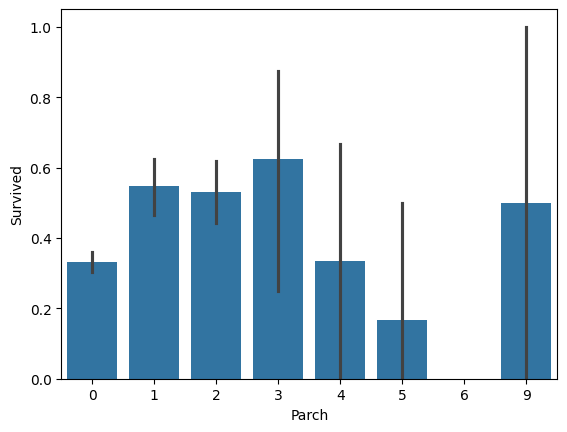

In [ ]:
# Vemos la relación con el número de padres/hijos (Parch)
print(df.groupby('Parch')['Survived'].mean() * 100)
sns.barplot(x='Parch', y='Survived', data=df)

# Conclusión: las personas solas o con muchos familiares parece que sobreviven peor
# No es una relación muy fuerte con la variable target pero podría ser interesante
# Se puede probar el modelo incluyendo esta variable y sin incluirla para analizar
# cómo obtenemos mejores resultados

SibSp
0    33.445567
1    52.037618
2    45.238095
3    25.000000
4    18.181818
5    16.666667
8    11.111111
Name: Survived, dtype: float64


<Axes: xlabel='SibSp', ylabel='Survived'>

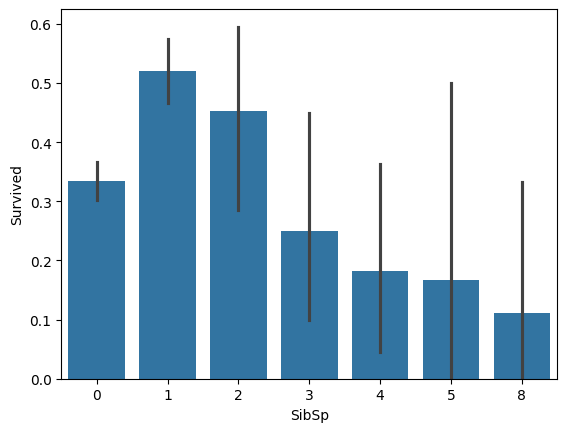

In [ ]:
# Vemos la relación con el número de familiares (SibSp)
print(df.groupby('SibSp')['Survived'].mean() * 100)
sns.barplot(x='SibSp', y='Survived', data=df)

# Conclusión: parece que las personas con 1-2 familiares a bordo tienen más opciones de supervivencia.
# Podemos probar el modelo con y sin la variable para ver cómo obtenemos mejores resultados
# A imple vista no podemos decir si es importante

/tmp/ipython-input-2261537818.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Fare_q')['Survived'].mean() * 100


<Axes: xlabel='Fare_q', ylabel='Survived'>

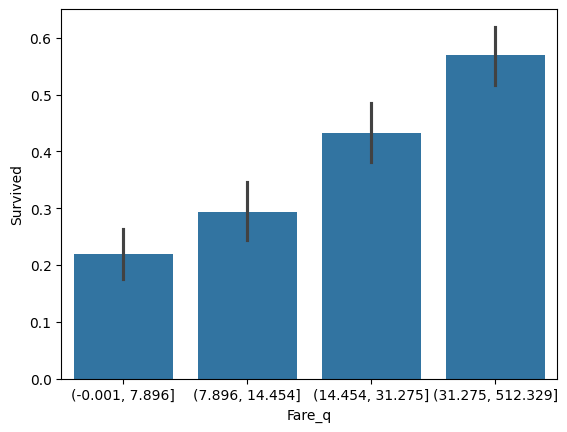

In [ ]:
# Vemos la relación con Fare
df['Fare_q'] = pd.qcut(df['Fare'], q=4)
df.groupby('Fare_q')['Survived'].mean() * 100
sns.barplot(x='Fare_q', y='Survived', data=df)

# Conclusión: cuanta más precio pago por el billete, mayor supervivencia
# Esto se debe a que está relacionado con la clase

Embarked
C    49.259259
Q    43.902439
S    33.369803
Name: Survived, dtype: float64


<Axes: xlabel='Embarked', ylabel='Survived'>

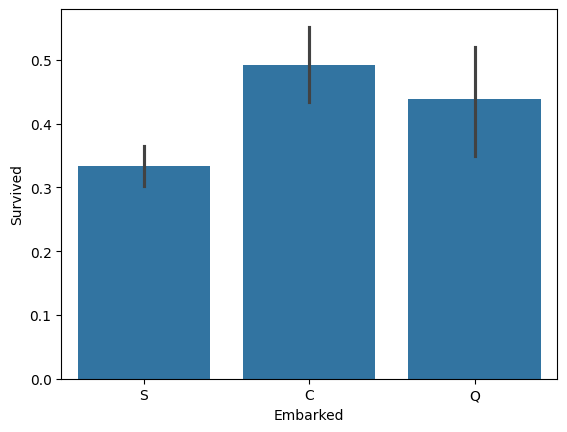

In [ ]:
# Vemos la relación con el puerto de embarque
print(df.groupby('Embarked')['Survived'].mean() * 100)
sns.barplot(x='Embarked', y='Survived', data=df)

# Conclusión: la diferencia no es muy grande pero puede ser relavante

#### Mapa de correlación (Correlation Heatmap)

Antes de entrenar un modelo, es importante entender **cómo se relacionan las variables entre sí**.
El mapa de correlación nos ayuda a ver si hay variables que tienen relación (positiva o negativa) con nuestro objetivo, en este caso *Survived*.

* Los valores van de **–1 a +1**

  * **+1** → relación positiva fuerte (cuando sube una, sube la otra)
  * **–1** → relación negativa fuerte (cuando sube una, baja la otra)
  * **0** → no hay relación lineal

Este gráfico nos ayuda a detectar:

✅ Variables que pueden ser útiles para predecir
⚠️ Variables redundantes (muy correlacionadas entre sí)
🚫 Columnas que no aportan información (correlación ~0)

En el Titanic, por ejemplo, esperamos que variables como
**clase del pasajero (Pclass)** o **tarifa pagada (Fare)** tengan relación con sobrevivir.

Ten en cuenta que esta matriz solo es para variables numéricas, para las categóricas necesitamos hacer lo visto anteriormente.

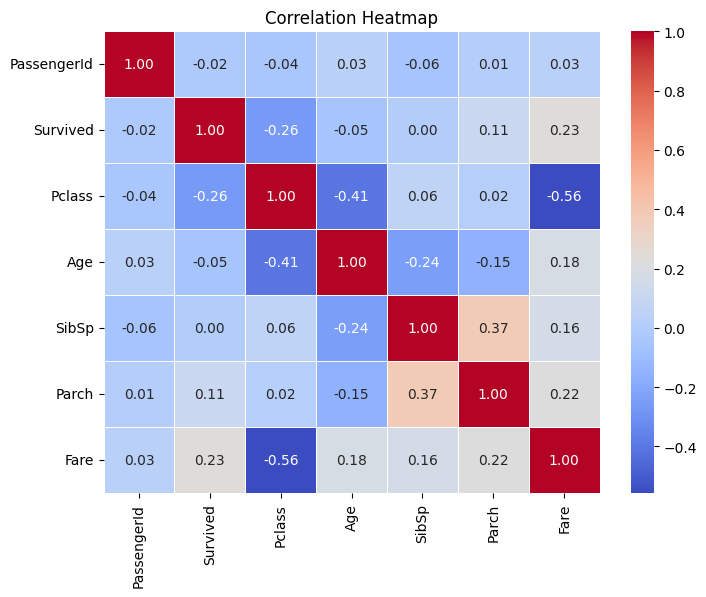

In [ ]:
# Matriz de correlación
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Detección de outliers

Los *outliers* son valores **numéricamente extremos** dentro de una variable numérica que se alejan mucho del resto de datos y pueden afectar al análisis o al modelo.

> **Importante:** un valor raro no siempre es un outlier.


### **Cuándo buscarlos**

Se analizan principalmente en **variables numéricas continuas**, porque pueden distorsionar medias, escalas y modelos sensibles a distancia.

| Tipo de variable          | ¿Buscar outliers? | Ejemplo                       |
| ------------------------- | ----------------- | ----------------------------- |
| Numérica continua         | ✅ Sí              | Precio (`Fare`), Edad (`Age`) |
| Numérica discreta pequeña | ⚠️ Normalmente no | `SibSp`, `Parch`              |
| Categórica                | ❌ No              | `Sex`, `Embarked`, `Pclass`   |


### **Ejemplo Titanic**

* `Fare`: valores muy altos → **sí revisar**
* `Age`: extremos reales (bebés, ancianos) → observar, no eliminar porque, además, hemos visto que los pequeños sobreviven más que los adultos. Los outliers de `Age` son importantes.
* `SibSp` / `Parch`: **conteos pequeños**, valores raros pero **no outliers**

```
SibSp: 0,1,2,3,4,5,8
Parch: 0,1,2,3,4,5,6
```

No puedes tener “100 hermanos en el Titanic” → estos valores son simplemente poco frecuentes, **no errores**.

### **Cómo detectarlos**

Métodos simples:

* **Boxplot** (visual): tienes que fijarte si hay apariciones de valores fuera de los bigotes.
* Describe() para ver mínimo/máximo

Ejemplo:

```python
sns.boxplot(x=df['Fare'])
```

#### **Qué es un boxplot**

Un **boxplot** es un gráfico que muestra cómo están distribuidos los datos de una variable numérica y permite detectar valores extremos (*outliers*) visualmente.

**Cómo se interpreta un boxplot**

El gráfico tiene varias partes:

* **Caja** → representa la mitad central de los datos (del 25% al 75%)
* **Línea dentro de la caja** → la **mediana** (el valor del medio)
* **Bigotes** → marcan el rango esperado de valores
* **Puntos fuera de los bigotes** → **posibles outliers**


| Situación               | Interpretación                           |
| ----------------------- | ---------------------------------------- |
| Hay pocos puntos lejos  | Outliers leves o reales                  |
| Hay muchos puntos fuera | Distribución sesgada / requiere análisis |
| Sin puntos fuera        | No hay outliers importantes              |


### **Cuándo tratar los outliers**

En **preprocesamiento**, si:

* Son errores evidentes (p. ej. una edad con valor -8)
* Afectan al modelo (p. ej. KNN sin escalar)

Si son reales y el modelo los tolera → **dejarlos**.

<Axes: xlabel='Fare'>

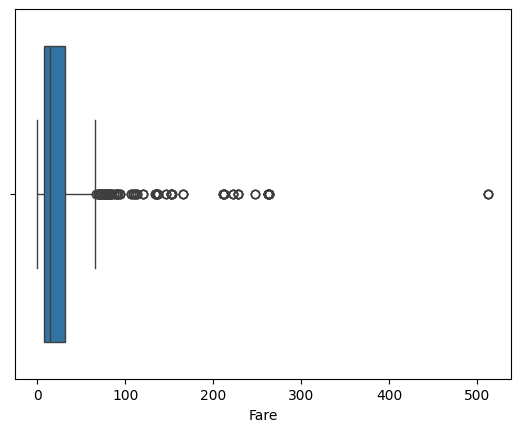

In [ ]:
# Analizamos los outliers en Fare
sns.boxplot(x=df['Fare'])

# Conclusión: vemos unos pocos outliers que pagaron mucho dinero por su ticket
# Es el momento de analizar la situación y pensar si es relevante mantener los outliers
# La mayoría de pasajeros pagó muy poco por su ticket (3º clase) y unos pocos
# pagaron muchísimo más (1ª clase de lujo).
# En la dependencia entre Survived y Pclass vimos que a mayor clase, mayor supervivencia
# por lo que es importante mantener el precio de los billetes sin modificaciones
# Es decir, no son errores, los pasarejos ricos realmente pagaron eso

# Los outliers de Fare representan pasajeros de primera clase.
# Quitarlos sería como decir: “los ricos no existieron”

<Axes: xlabel='Age'>

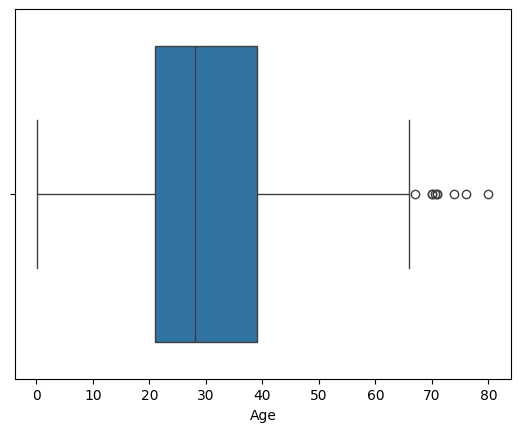

In [ ]:
# Analizamos los outliers en Age
sns.boxplot(x=df['Age'])

# Conclusión: la mayoría de viajeros están entre los 20-40 años.
# Vemos valores altos (60–80 años).
# El boxplot los marca como posibles outliers, pero son edades reales, no errores.
# Por eso NO se eliminan. Los mantenemos y simplemente escalamos la variable.


## 🧹 Preprocesamiento de datos

Después de analizar el dataset con EDA, pasamos al **preprocesamiento**, es decir, preparar los datos para que el modelo pueda aprender correctamente.

En esta fase:

* Eliminamos columnas que no aportan información útil
* Nos quedamos solo con las variables que usamos para predecir
* Separamos los datos en:

  * **X** → las características (features), es decir, las columnas que usaremos para predecir
  * **y** → el objetivo (target), la columna que queremos predecir (en este caso, `Survived`)
* Dividimos los datos en train y test
* Una vez dividido el dataset:

  * **Imputamos valores faltantes**
  (rellenamos NaN con la media, mediana o valor más frecuente)
  * **Codificamos variables categóricas**
  (convertimos texto en números, por ejemplo con `LabelEncoder`)
  * **Escalamos las variables numéricas**
  (para que tengan una escala similar — importante para algoritmos como KNN)

**¿Qué es Train y Test?**

Antes de transformar los datos, los dividimos en dos partes:

| Parte     | Contenido                                 | Para qué sirve           |
| --------- | ----------------------------------------- | ------------------------ |
| **Train** | Datos utilizados para entrenar el modelo  | El modelo aprende aquí   |
| **Test**  | Datos que guardamos para probar el modelo | El modelo se evalúa aquí |

Esto permite comprobar si el modelo realmente aprende a generalizar y no solo memoriza los datos.

**¿Por qué dividir antes de preprocesar? → *Data Leakage***

Primero hacemos el **train/test split** y luego preprocesamos **solo con los datos de train**.

Después aplicamos ese mismo preprocesamiento a los datos de test.

Esto se hace para evitar **data leakage**, que ocurre cuando el modelo “ve” información del test durante el entrenamiento.
Sería como hacer trampas (el modelo aprende con datos que debería desconocer) y daría resultados engañosos.

**Ejemplo concreto de data leakage**

Supongamos que queremos rellenar los valores de `Age` con la **media**.

**❌ Caso incorrecto**

Calcular la media de *todo* el dataset:

```
Edad media de TODOS los pasajeros = 29.6
```

Luego asignar esa media a train y test.

**¿Qué pasó?**
El modelo indirectamente se benefició de conocer una estadística global que incluye datos del test.

El test dejó de ser “nuevo” → perdió su valor real como evaluación.

**✅ Caso correcto**

Calcular la media SOLO con *train*:

```
Edad media SOLO del train = 30.2
```

Luego aplicar esa media solo al test:

```
A los pasajeros del test sin edad les pongo *30.2*,
no 29.6, porque 29.6 usaba info del test.
```

Ahora sí:

* El modelo solo aprendió con train
* Test sigue siendo realmente “desconocido”


In [ ]:
# Excluimos identificadores y texto libre como 'Name', 'Ticket', 'Cabin'.
# El resto ya hemos analizado que pueden ser útiles
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']
target = 'Survived'

X = df[features].copy() # Hacemos una copy porque le vamos a hacer modificaciones más tarde (rellenar nulos, etc)
y = df[target]

# Dividimos los datos entre train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# INICIO PREPROCESAMIENTO

# Comprobación para ver que se hace bien
print("Nulos antes de imputar NaN")
print(X_train.isna().sum())
print(X_test.isna().sum())

# --- Imputar NaN ---
# Embarked con el valor más frecuente
imputer = SimpleImputer(strategy='most_frequent')
X_train[['Embarked']] = imputer.fit_transform(X_train[['Embarked']])
X_test [['Embarked']] = imputer.transform(X_test[['Embarked']])

# Comprobación para ver que se hace bien
print("Nulos después de imputar NaN")
print(X_train.isna().sum())
print(X_test.isna().sum())

Nulos antes de imputar NaN
Pclass        0
Sex           0
Age         204
Fare          0
SibSp         0
Parch         0
Embarked      0
dtype: int64
Pclass       0
Sex          0
Age         59
Fare         1
SibSp        0
Parch        0
Embarked     2
dtype: int64
Nulos después de imputar NaN
Pclass        0
Sex           0
Age         204
Fare          0
SibSp         0
Parch         0
Embarked      0
dtype: int64
Pclass       0
Sex          0
Age         59
Fare         1
SibSp        0
Parch        0
Embarked     0
dtype: int64


In [ ]:
# Aquí también habría que comprobar que se rellena correctamente
# Se omite por brevedad
# Edad con la media
imputer_age  = SimpleImputer(strategy='mean')
X_train[['Age']] = imputer_age.fit_transform(X_train[['Age']])
X_test[['Age']] = imputer_age.transform(X_test[['Age']])

# Fare con la media
imputer_fare = SimpleImputer(strategy='mean')
X_train[['Fare']] = imputer_fare.fit_transform(X_train[['Fare']])
X_test[['Fare']]  = imputer_fare.transform(X_test[['Fare']])



In [ ]:
# --- Codificar variables categóricas ---
# 'Sex': male=0, female=1
le_sex = LabelEncoder()
X_train['Sex'] = le_sex.fit_transform(X_train['Sex'])
X_test['Sex'] = le_sex.transform(X_test['Sex'])

le_emb = LabelEncoder()
X_train['Embarked'] = le_emb.fit_transform(X_train['Embarked'])
X_test['Embarked'] = le_emb.transform(X_test['Embarked'])

In [ ]:
# --- Escalado de características (importante para KNN) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🤖 Entrenamiento del modelo

Una vez que hemos preprocesado nuestros datos, estamos listos para **entrenar el modelo de Machine Learning**.

En esta etapa:

* Usamos el conjunto de **entrenamiento (X_train, y_train)** para que el modelo aprenda patrones de los datos.
* El modelo ajusta sus parámetros internos para poder realizar predicciones.
* No utilizamos aún los datos de test, para asegurarnos de que la evaluación posterior sea realista y no haya *data leakage*.

En nuestro caso, entrenaremos un modelo **K-Nearest Neighbors (KNN)**.
Este algoritmo clasifica cada pasajero basándose en los pasajeros más similares en los datos de entrenamiento.

> El modelo aprende solo con los datos de *train*.
> Después comprobaremos su rendimiento con *test* para ver qué tan bien generaliza.


In [ ]:
# Entrenamiento del modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

## 🧪 Evaluación del modelo

Después de entrenar el modelo, debemos comprobar qué tan bien funciona al predecir datos **nuevos y no vistos**, es decir, el conjunto de **test**.

En esta fase:

* Usamos el modelo para predecir `y_pred` a partir de `X_test`
* Comparamos esas predicciones con los valores reales `y_test`
* Calculamos métricas de desempeño

Las métricas que podemos utilizar con KNN son:

* ✅ **Accuracy (Exactitud):**
  Proporción de predicciones correctas sobre el total. Es fácil de entender, aunque puede ser engañosa si las clases están desbalanceadas.

* 📊 **Matriz de confusión:**
  Muestra cuántos casos se clasificaron correctamente y cuántos se confundieron entre clases.
  Permite ver **aciertos y errores** por tipo (sobrevive / no sobrevive).

* 📑 **Reporte de clasificación:**
  Incluye métricas más completas como:

  | Métrica       | Significado                                             |
  | ------------- | ------------------------------------------------------- |
  | **Precision** | Qué porcentaje de predicciones positivas son correctas  |
  | **Recall**    | Qué porcentaje de los casos positivos reales detectamos |
  | **F1-Score**  | Balance entre precisión y recall                        |

Estas métricas nos ayudan a analizar si el modelo está funcionando bien y dónde puede mejorar.

> Primero entrenamos, luego evaluamos.
> El objetivo es ver qué tan bien generaliza el modelo a datos nuevos.


✅ Exactitud (accuracy): 81.3 %


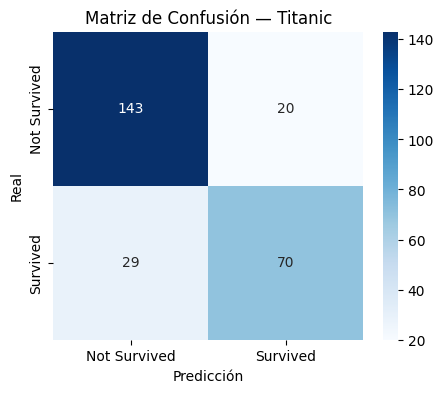

In [ ]:
# --- Evaluación ---
y_pred = knn.predict(X_test_scaled)

print("\n✅ Exactitud (accuracy):", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

cm = confusion_matrix(y_test, y_pred)

# Gráfico para la matriz de confusión
labels = ["Not Survived", "Survived"]
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión — Titanic')
plt.show()

### Evaluación final de las métricas obtenidas

El modelo ha obtenido una **exactitud (accuracy) del 81.3%**.

Esto significa que:

> **El modelo acierta aproximadamente el 81% de las veces al predecir si un pasajero sobrevivió o no.**

En otras palabras, de cada 100 pasajeros del conjunto de test:

* ~81 fueron clasificados correctamente
* ~19 fueron clasificados de forma incorrecta

Debes tener en cuenta que:

* **81% es un resultado decente** para un modelo inicial y sencillo como KNN en el Titanic.
* Sin embargo, **accuracy no siempre cuenta toda la historia**, especialmente si las clases están desbalanceadas.

  * Ejemplo extremo: si el 90% no sobrevive, un modelo que diga *“todos mueren”* tendría 90% accuracy pero **no sirve**.
* Por eso complementamos con **matriz de confusión** y **precision/recall/F1**.

**¿Cómo detecto si hay problemas aunque accuracy sea bueno?**

| Señal                               | Posible problema                     |
| ----------------------------------- | ------------------------------------ |
| Accuracy muy alto (>90%)            | **Data leakage** probable            |
| Accuracy muy bajo (~50%)            | Modelo no aprende / mal preprocesado |
| Modelo acierta solo "no sobrevivió" | Clasificación sesgada (imbalance)    |

Si tu matriz de confusión muestra que predice bien **ambas clases**, entonces **todo bien** ✅.

En este caso, la matriz de confusión muestra cuántos casos el modelo acierta y cuántos se equivoca.
Lo ideal es ver valores altos en la diagonal (predicciones correctas) y bajos fuera de ella.